In [71]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from copy import deepcopy
import time
import pickle
import psutil
import pandas as pd

for module in ['BayesianNetwork1', 'BayesianNetwork2', 'BaseModels', 'Utility']:
    if module in sys.modules:  
        print(f'Deleting {module}')
        del sys.modules[module]

from BayesianNetwork1 import BayesianRegressionWrapper, RegressionSampler
# from BayesianNetwork2 import RegressionSampler as RegressionSamplerMALA
from BaseModels import LR, FFN
from Utility import generate_linear_data, gd, generate_samples, display_results

Deleting BayesianNetwork1
Deleting BaseModels
Deleting Utility


# MAIN CONFIG

In [64]:
epochs = 40000
samples = 40000
burn_in = int(samples / 2)

# Linear regression

### CONFIG

In [93]:
N = 500
input_size = 4
input_sd = 4
output_size = 1
output_sd = 2.5

torch.manual_seed(1234)
np.random.seed(1234)

model_lr = LR(input_size, output_size)

### Generate linear data

In [94]:
seed = 1234

torch.manual_seed(seed)
np.random.seed(seed)

X, y, w_true, intercept_true, y_mean = generate_linear_data(N=N, input_size=input_size, input_sd=input_sd, 
                                                           output_size=output_size, output_sd=output_sd)

print(intercept_true, w_true)

tensor([[0.0461]]) tensor([[ 0.4024],
        [-1.0115],
        [ 0.2167],
        [-0.6123]])


### Gradient descent

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 2.560866696005611


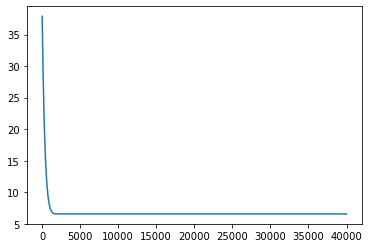

In [95]:
model, losses = gd(deepcopy(model_lr), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

### Sampler

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

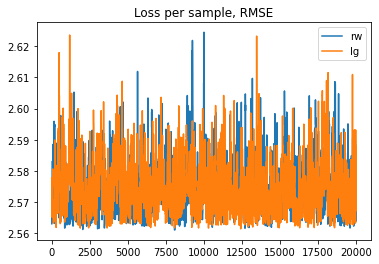

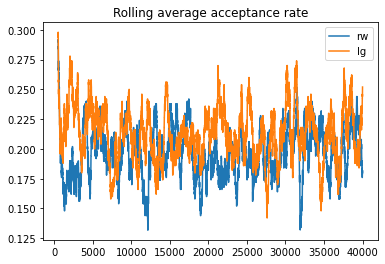

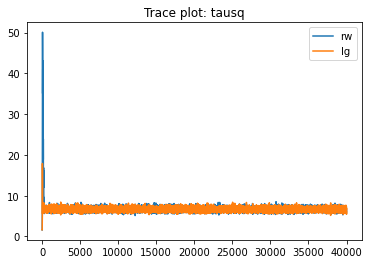

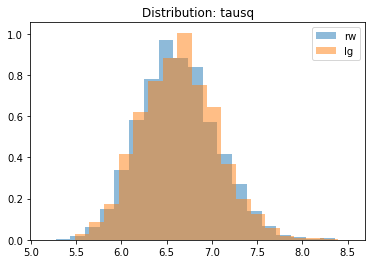

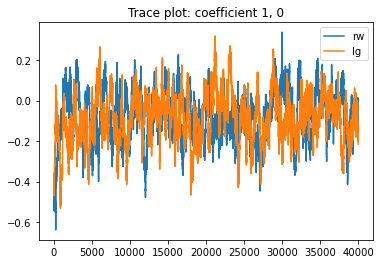

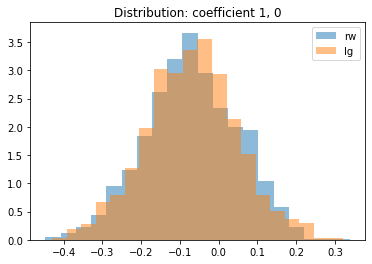

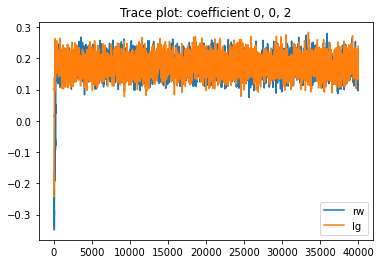

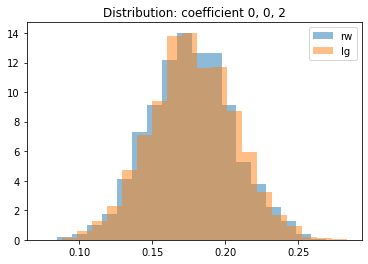

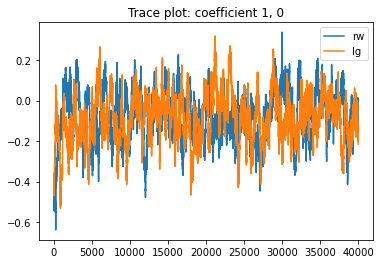

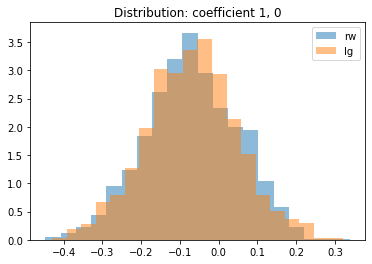

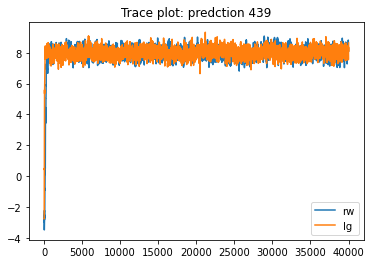

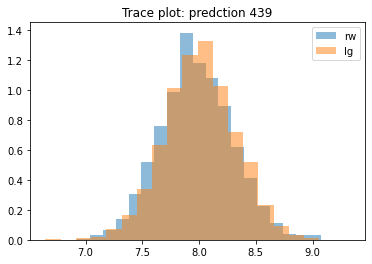

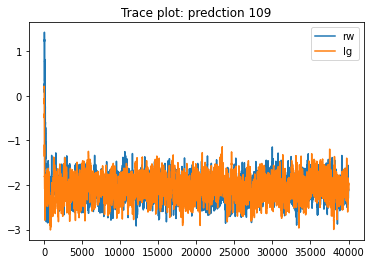

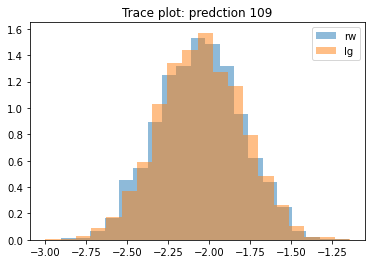

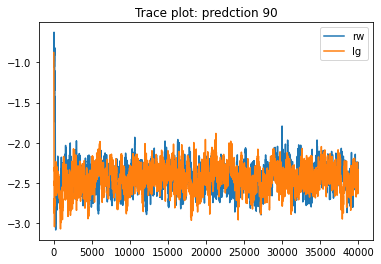

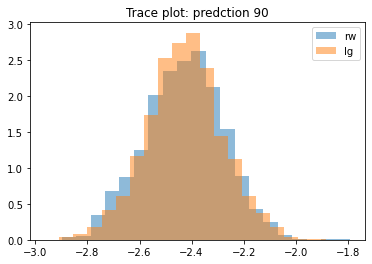

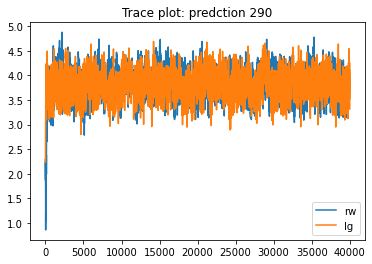

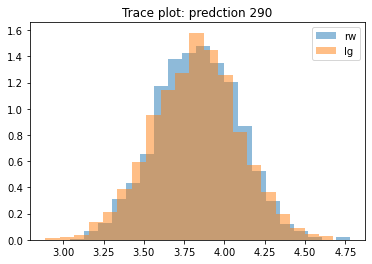

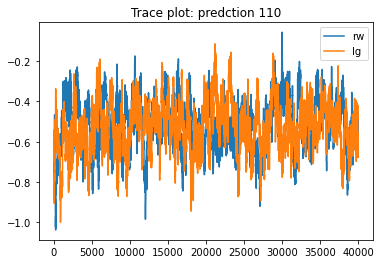

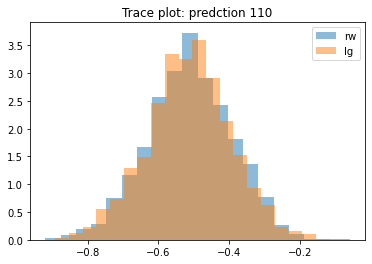

In [96]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_lr))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_lr)

# Feedforward Neural Network

### CONFIG

In [80]:
torch.manual_seed(1234)
np.random.seed(1234)

model_ffn = FFN(4, 5, 1)

## Lazer

In [81]:
traindata = np.loadtxt("Data/Lazer/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.011779284219516805


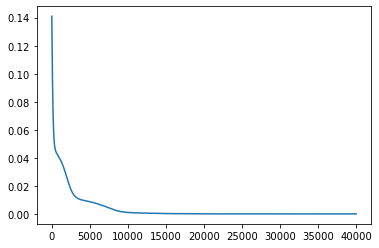

In [82]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

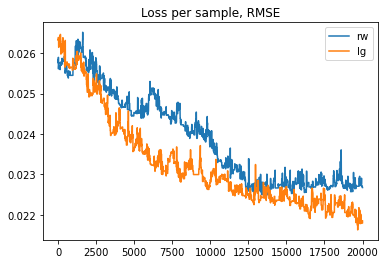

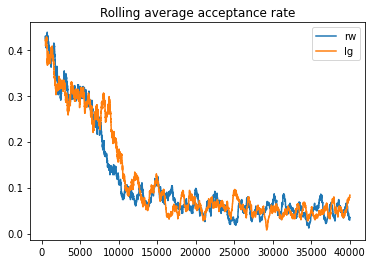

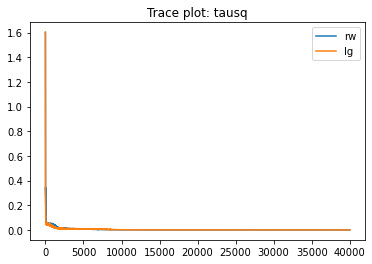

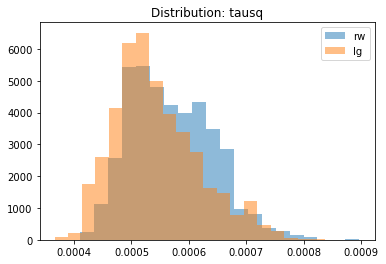

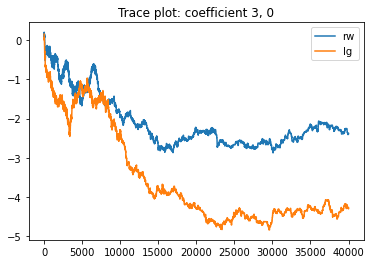

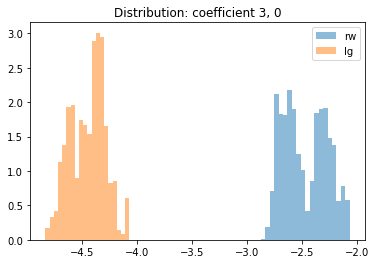

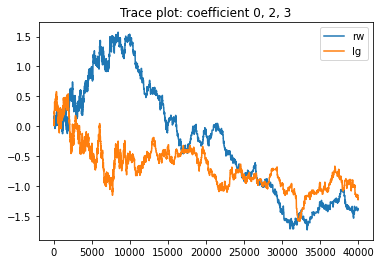

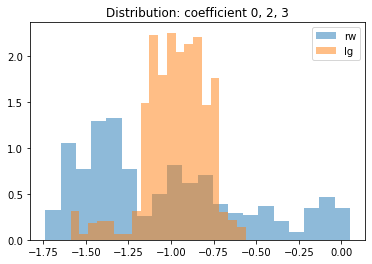

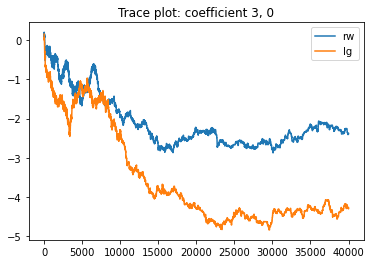

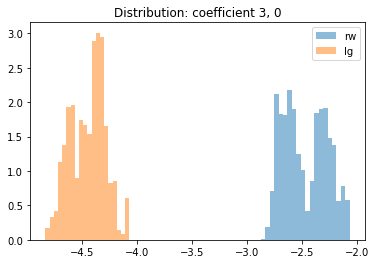

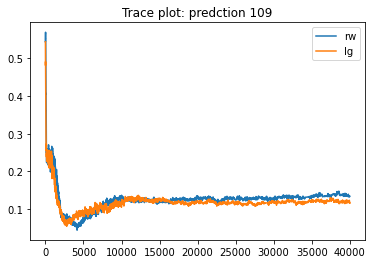

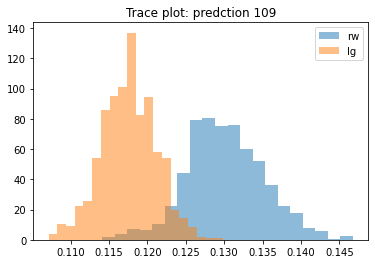

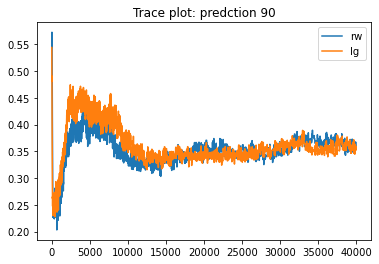

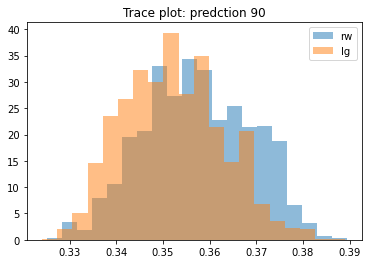

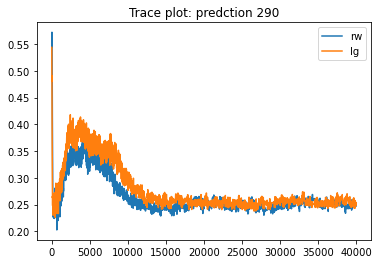

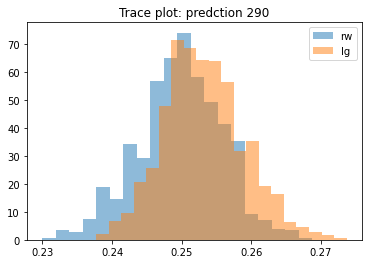

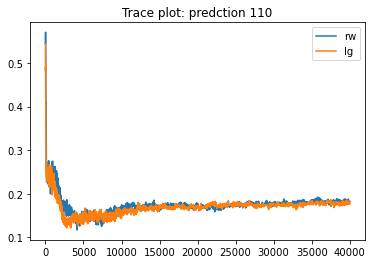

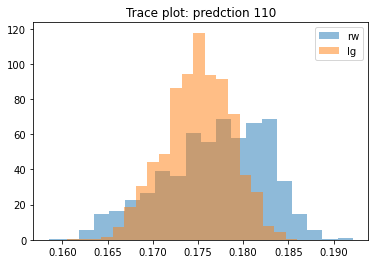

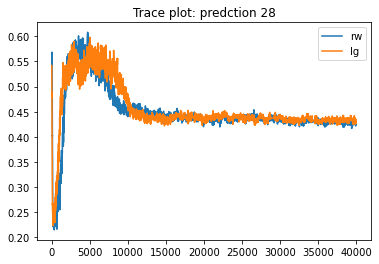

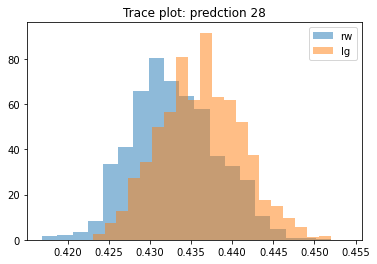

In [83]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

## Sunspot

In [84]:
traindata = np.loadtxt("Data/Sunspot/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.006730871720183294


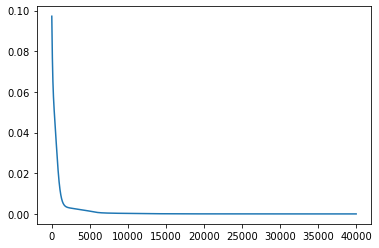

In [85]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

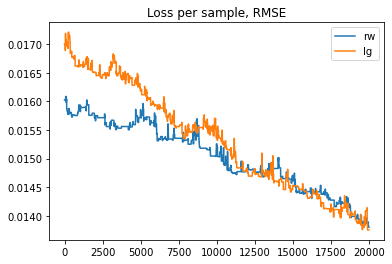

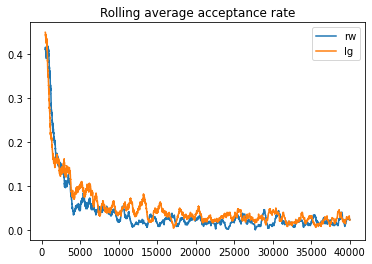

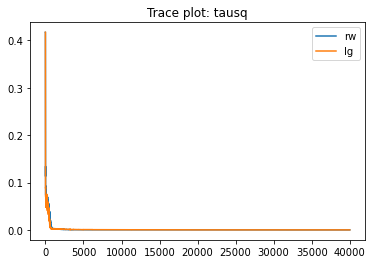

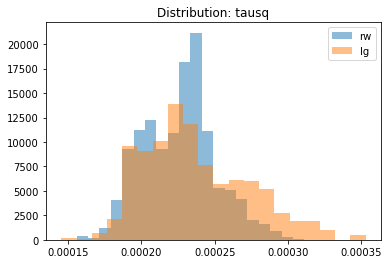

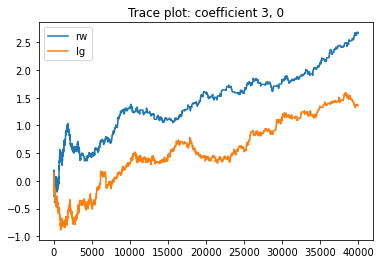

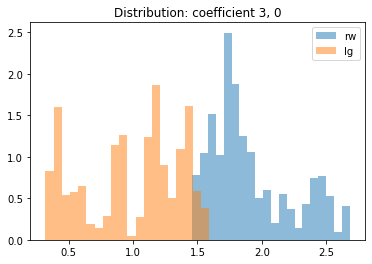

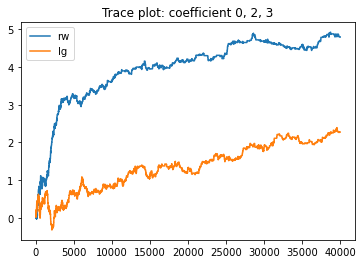

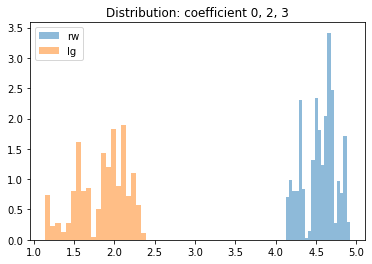

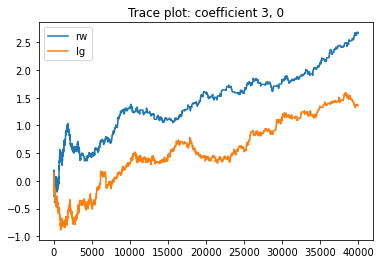

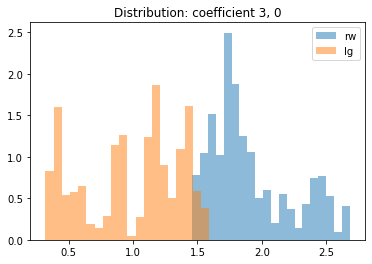

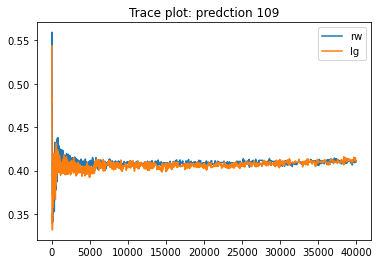

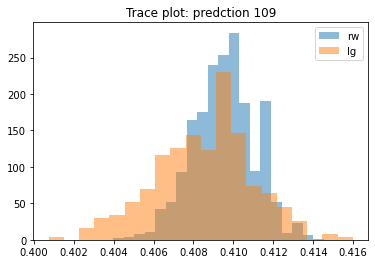

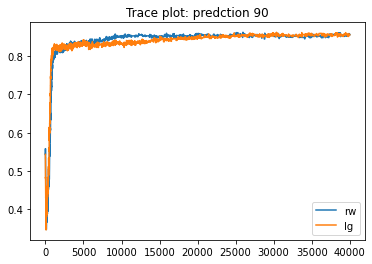

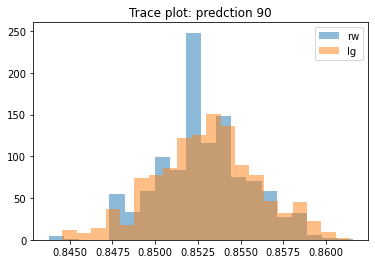

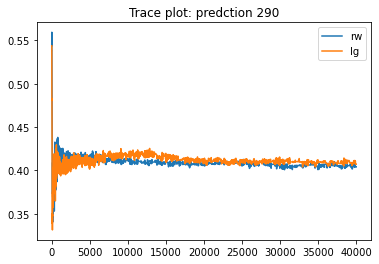

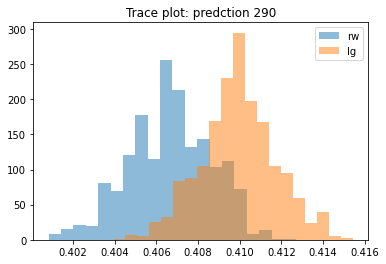

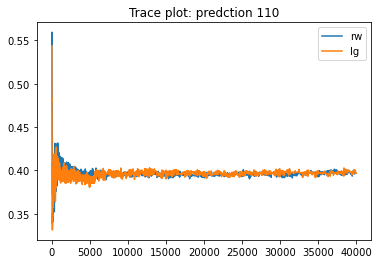

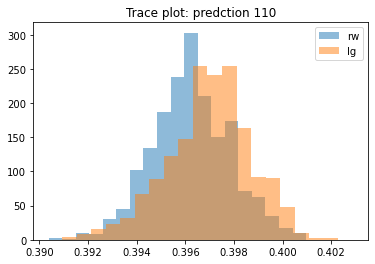

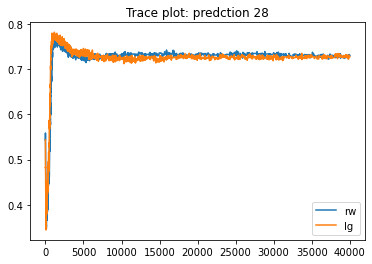

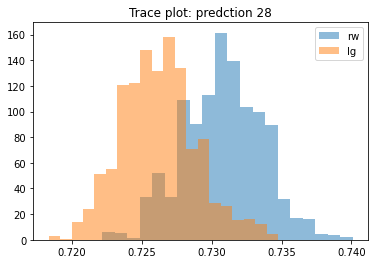

In [86]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

## Mackey

In [87]:
traindata = np.loadtxt("Data/Mackey/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.0015205691758418338


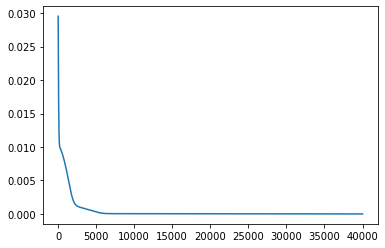

In [88]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

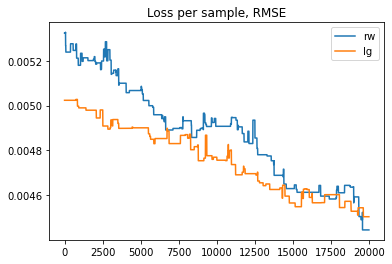

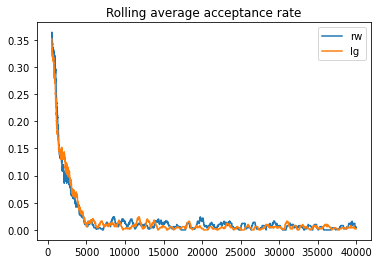

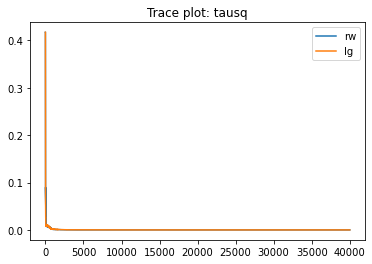

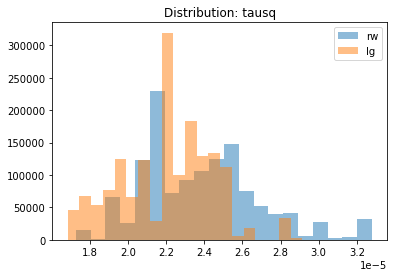

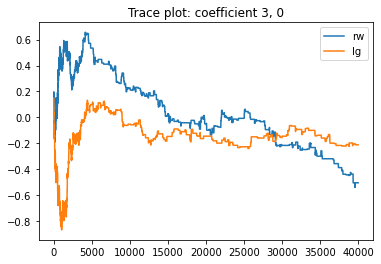

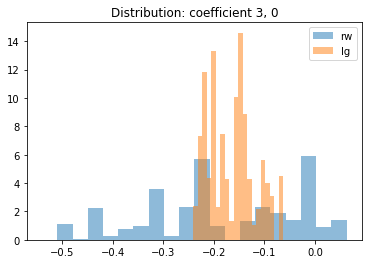

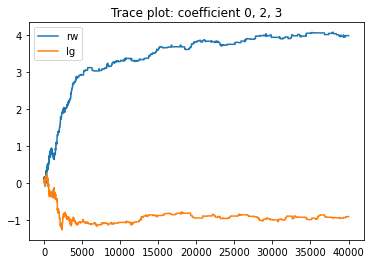

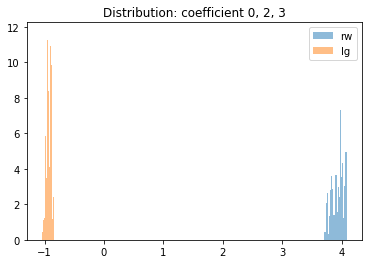

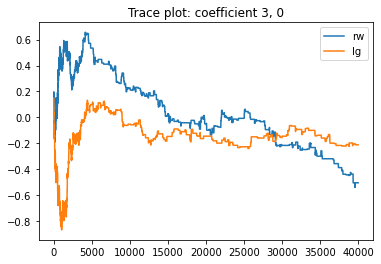

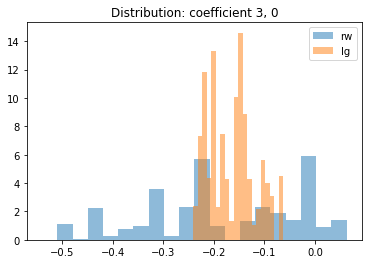

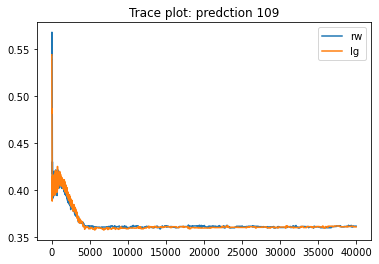

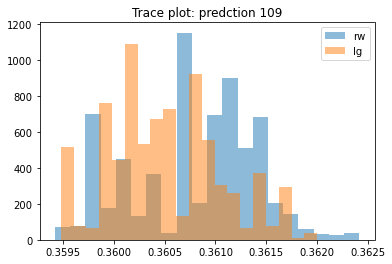

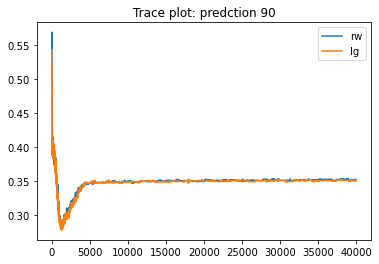

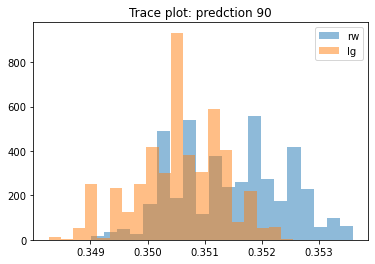

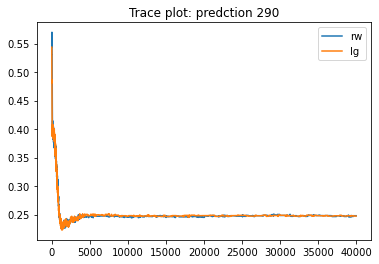

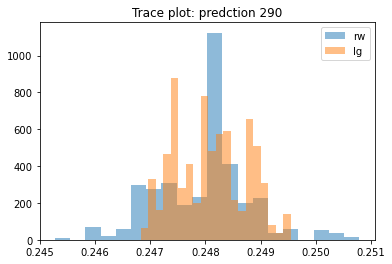

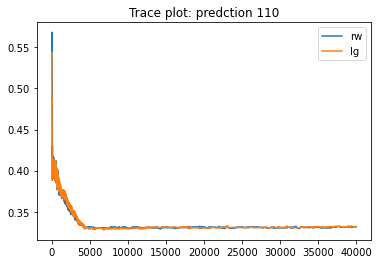

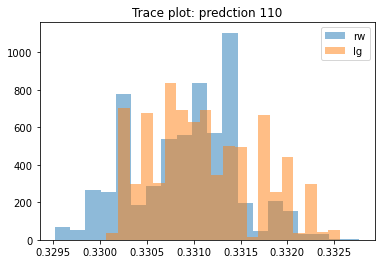

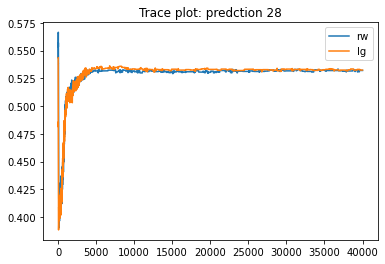

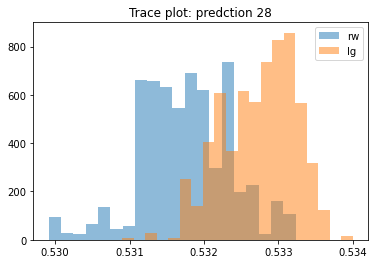

In [89]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

## Lorenz

In [66]:
traindata = np.loadtxt("Data/Lorenz/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.001187992339016676


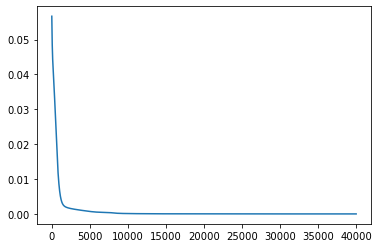

In [67]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

Final loss, RMSE, rw: 0.008326339905187824
Final acceptance rate, rw: 0.029224269393265168
Final loss, RMSE, lg: 0.009305078059070321
Final acceptance rate, lg: 0.03262418439539012


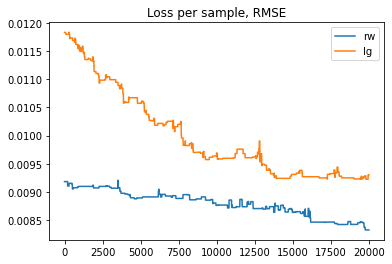

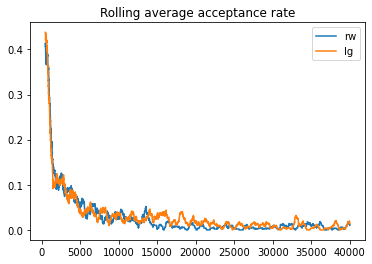

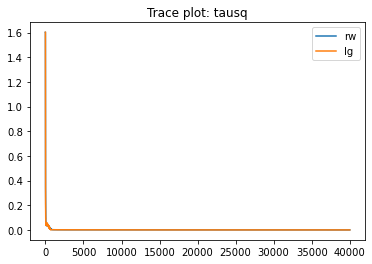

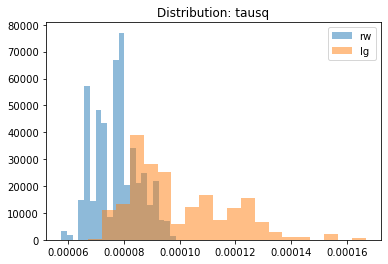

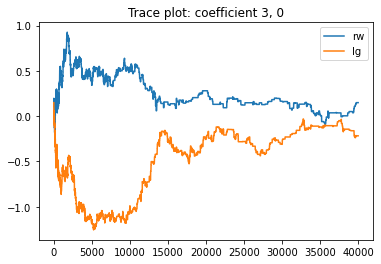

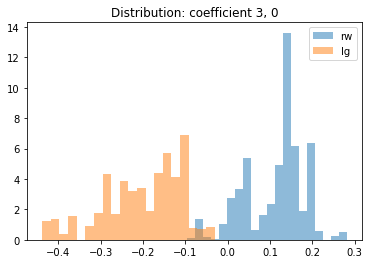

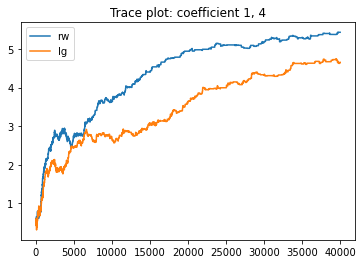

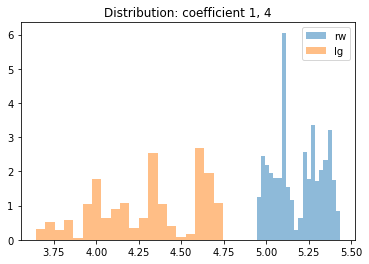

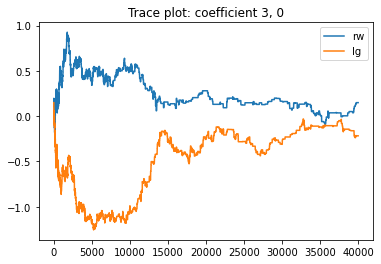

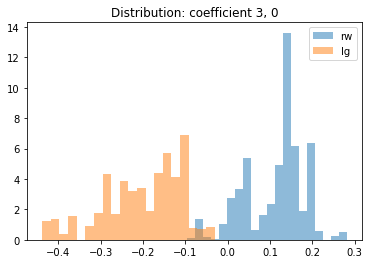

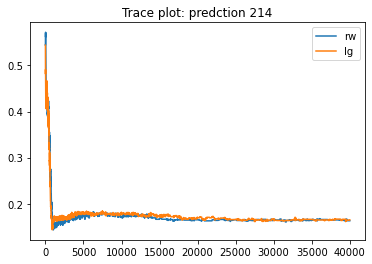

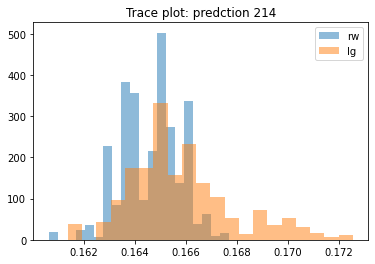

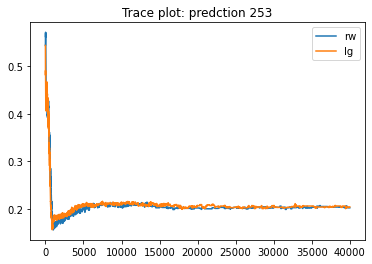

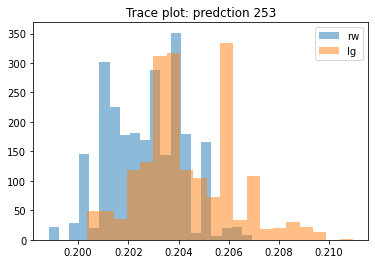

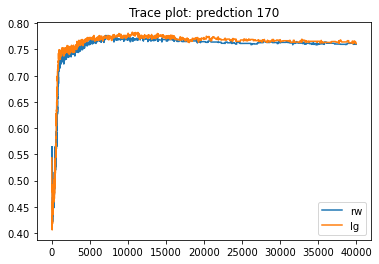

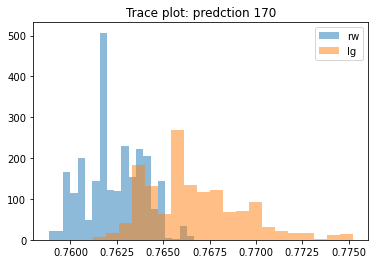

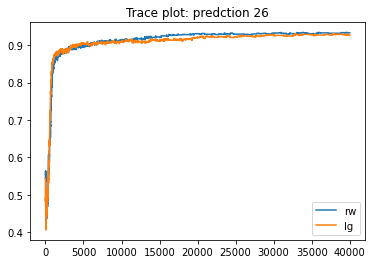

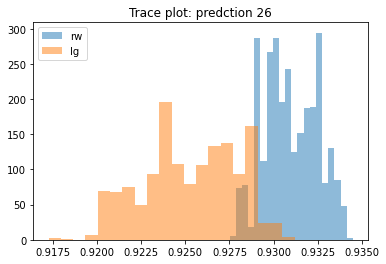

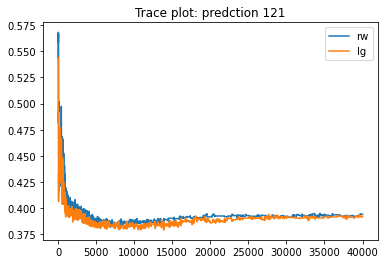

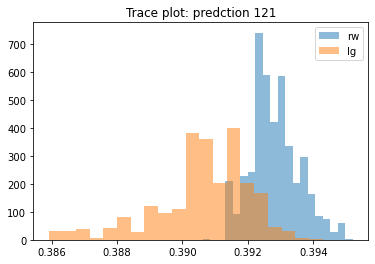

In [72]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

## Rossler

In [73]:
traindata = np.loadtxt("Data/Rossler/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.002344355231081866


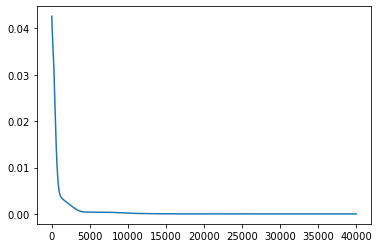

In [74]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

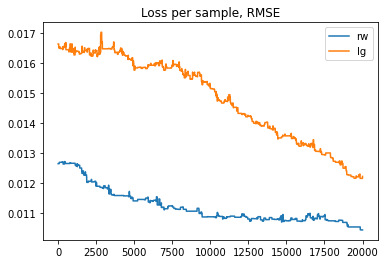

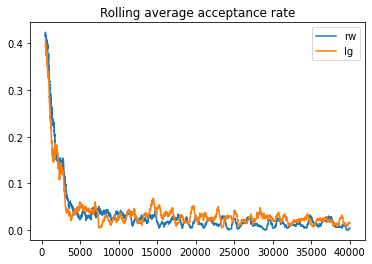

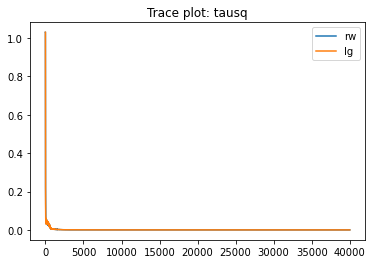

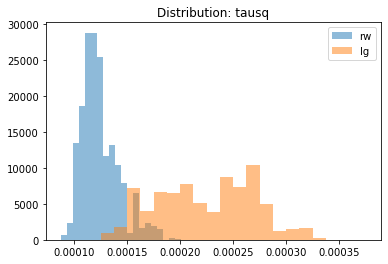

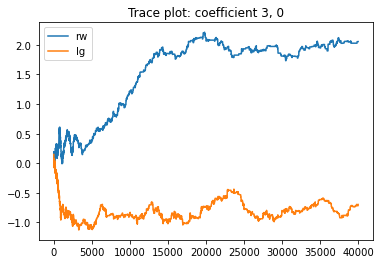

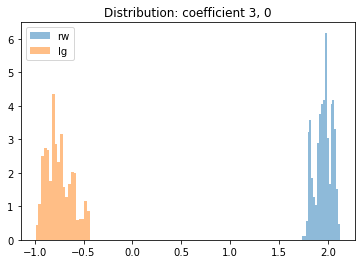

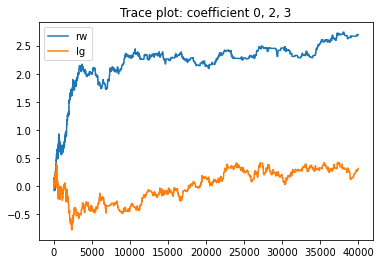

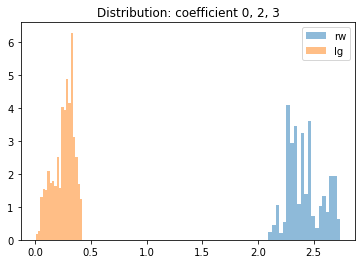

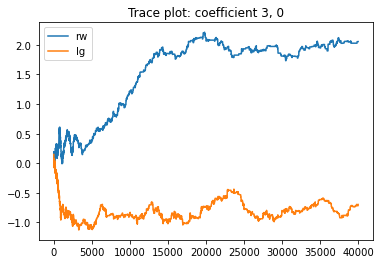

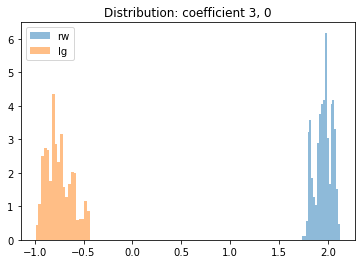

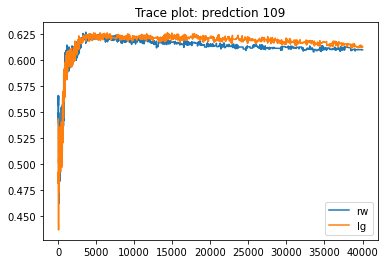

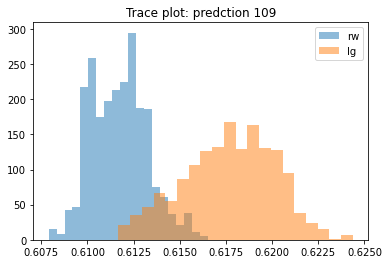

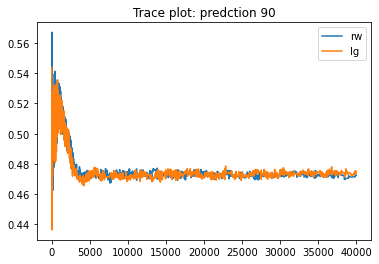

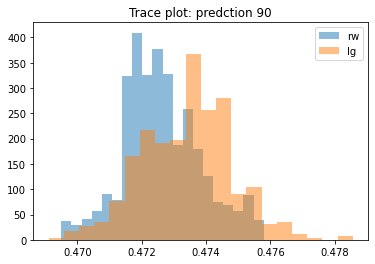

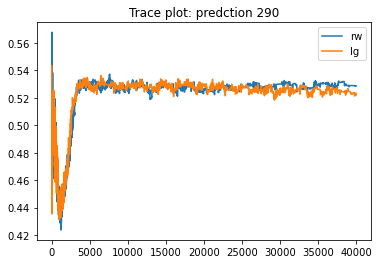

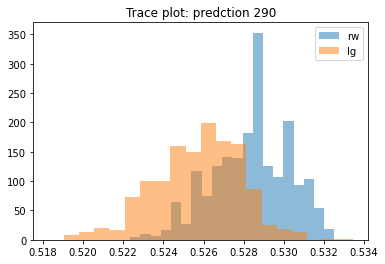

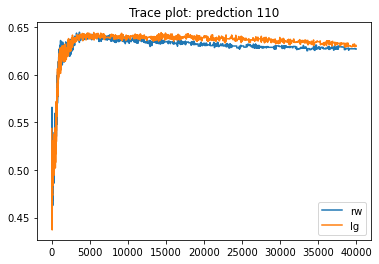

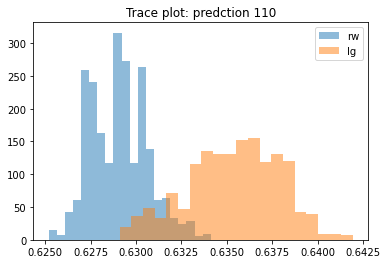

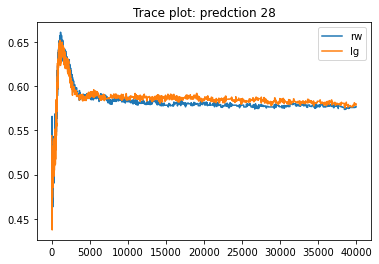

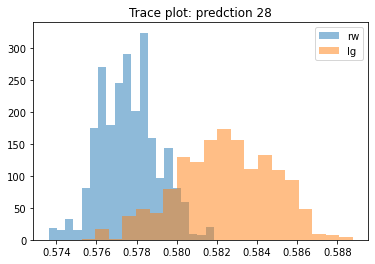

In [75]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

## Henon

In [90]:
traindata = np.loadtxt("Data/Henon/train.txt")
X = torch.tensor(traindata[:, :-1], dtype=torch.float)
y = torch.tensor(traindata[:, -1], dtype=torch.float).reshape(-1, 1)

Done: 5000 / 40000
Done: 10000 / 40000
Done: 15000 / 40000
Done: 20000 / 40000
Done: 25000 / 40000
Done: 30000 / 40000
Done: 35000 / 40000
Done: 40000 / 40000
Final loss, RMSE: 0.003196267321791226


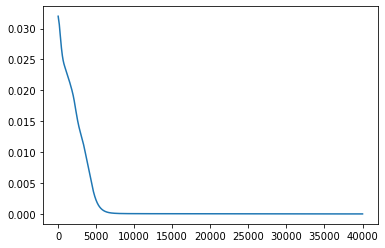

In [91]:
model, losses = gd(deepcopy(model_ffn), X, y, epochs)
plt.plot(losses)
print(f"Final loss, RMSE: {losses[-1] ** 0.5}")

RW sampling for rw, done: 1000 / 40000
RW sampling for rw, done: 2000 / 40000
RW sampling for rw, done: 3000 / 40000
RW sampling for rw, done: 4000 / 40000
RW sampling for rw, done: 5000 / 40000
RW sampling for rw, done: 6000 / 40000
RW sampling for rw, done: 7000 / 40000
RW sampling for rw, done: 8000 / 40000
RW sampling for rw, done: 9000 / 40000
RW sampling for rw, done: 10000 / 40000
RW sampling for rw, done: 11000 / 40000
RW sampling for rw, done: 12000 / 40000
RW sampling for rw, done: 13000 / 40000
RW sampling for rw, done: 14000 / 40000
RW sampling for rw, done: 15000 / 40000
RW sampling for rw, done: 16000 / 40000
RW sampling for rw, done: 17000 / 40000
RW sampling for rw, done: 18000 / 40000
RW sampling for rw, done: 19000 / 40000
RW sampling for rw, done: 20000 / 40000
RW sampling for rw, done: 21000 / 40000
RW sampling for rw, done: 22000 / 40000
RW sampling for rw, done: 23000 / 40000
RW sampling for rw, done: 24000 / 40000
RW sampling for rw, done: 25000 / 40000
RW sampli

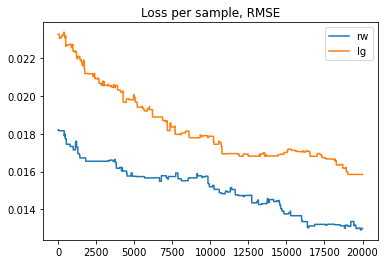

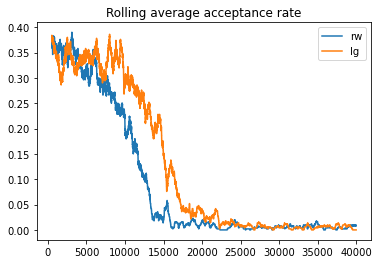

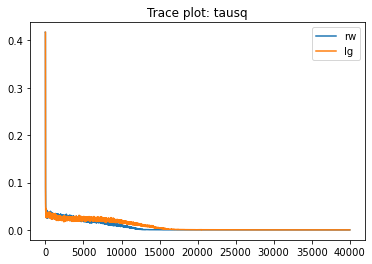

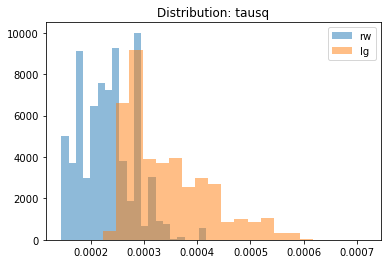

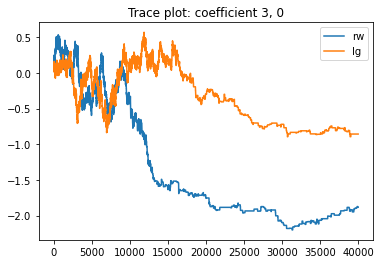

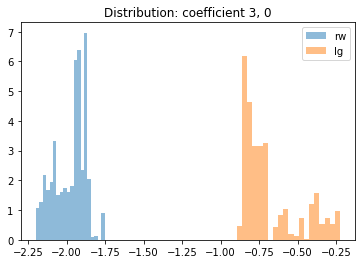

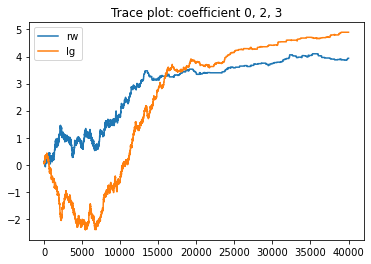

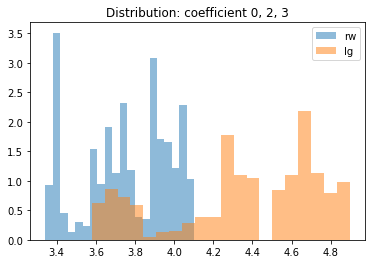

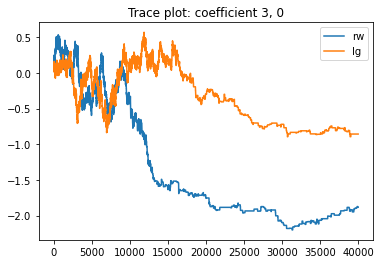

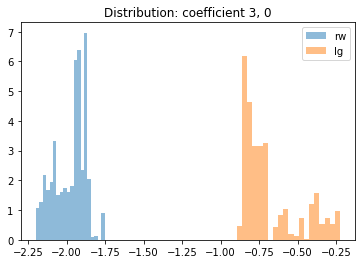

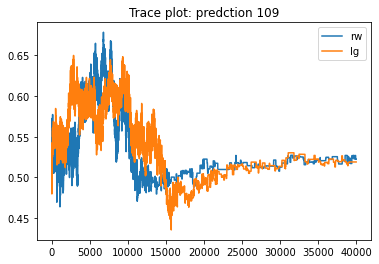

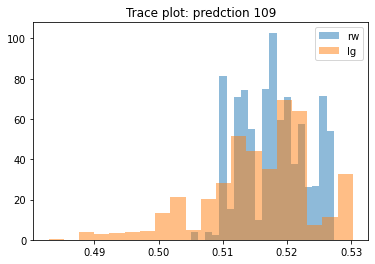

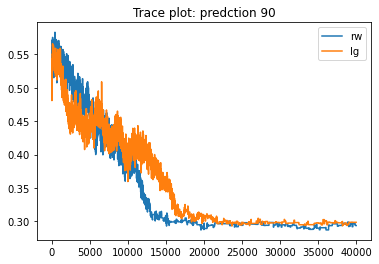

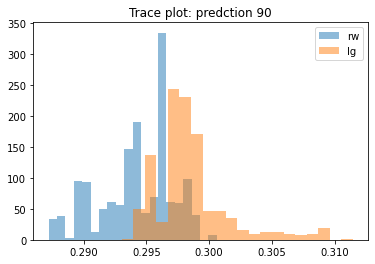

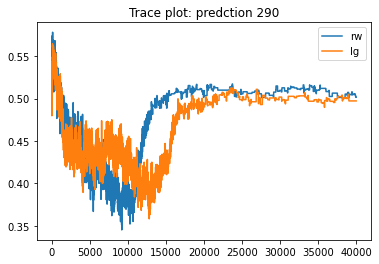

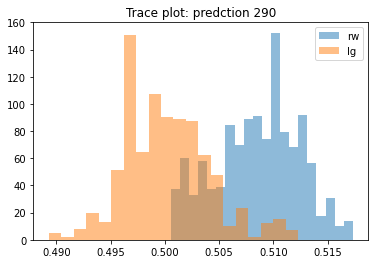

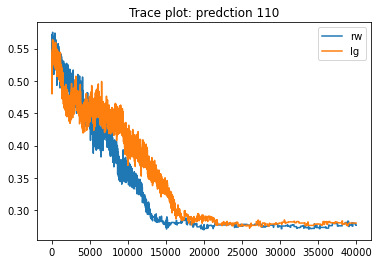

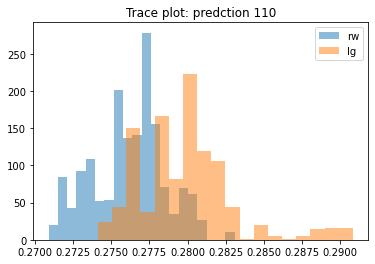

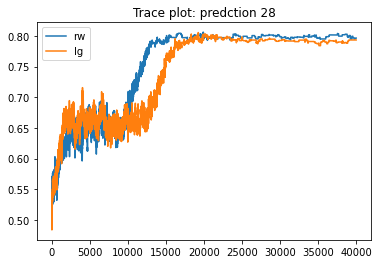

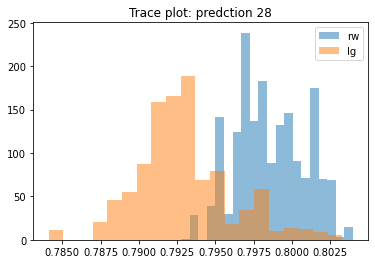

In [92]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.001, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=samples, seed=1234)
display_results(sampler_dict, burn_in, X, y, model_ffn)

# Scratch (dump for old code)

In [ ]:
bayes_model = BayesianRegressionWrapper(deepcopy(model_ffn))
sampler_rw = RegressionSampler(deepcopy(bayes_model), X, y, prop_sd=0.025, tausq_prop_sd=0.20)
sampler_lg = RegressionSampler(deepcopy(bayes_model), X, y, lr=0.01, prop_sd=0.025, tausq_prop_sd=0.20)

sampler_dict = {"rw": sampler_rw, "lg": sampler_lg}
algo_dict = {"rw": "rw", "lg": "lg"}

generate_samples(sampler_dict, algo_dict, X, y, samples=1000, seed=1234)

display_results(sampler_dict, 10, X, y, model_ffn)

In [ ]:
# def mcmc_sims(base_model, X, y, lr=0.0001, prop_sd=0.02, tausq_prop_sd=0.05, seed=1234):
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     base_model_rw = deepcopy(base_model)
#     bayes_model_rw = BayesianRegressionWrapper(base_model_rw)
#     sampler_rw = RegressionSampler(bayes_model_rw, X, y, lr=lr, prop_sd=prop_sd, tausq_prop_sd=tausq_prop_sd)
    
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     base_model_lg = deepcopy(base_model)
#     bayes_model_lg = BayesianRegressionWrapper(base_model_lg)
#     sampler_lg = RegressionSampler(bayes_model_lg, X, y, lr=lr, prop_sd=prop_sd, tausq_prop_sd=tausq_prop_sd)
    
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     base_model_mala = deepcopy(base_model)
#     bayes_model_mala = BayesianRegressionWrapper(base_model_mala)
#     sampler_mala = RegressionSamplerMALA(bayes_model_mala, X, y, prop_sd=prop_sd, tausq_prop_sd=tausq_prop_sd)
    
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     for i in range(samples):
#         sampler_rw.rw_mcmc(X, y)
#         if (i + 1) % 1000 == 0:
#             print(f"RW sampling, done: {i + 1} / {samples}")
        
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     for i in range(samples):
#         sampler_lg.lg_mcmc(X, y)
#         if (i + 1) % 1000 == 0:
#             print(f"LG sampling, done: {i + 1} / {samples}")
    
#     torch.manual_seed(seed)
#     np.random.seed(seed)
    
#     for i in range(samples):
#         sampler_mala.lg_mcmc(X, y)
#         if (i + 1) % 1000 == 0:
#             print(f"MALA sampling, done: {i + 1} / {samples}")
            
#     return sampler_rw, sampler_lg, sampler_mala
            
# def plot_results(base_model, sampler_rw, sampler_lg, sampler_mala, X, y):
    
#     acceptance_rate_rw = sum([w[-1] for w in sampler_rw.container.data]) / samples
#     acceptance_rate_lg = sum([w[-1] for w in sampler_lg.container.data]) / samples
#     acceptance_rate_mala = sum([w[-1] for w in sampler_mala.container.data]) / samples
#     acceptance_rate_tausq_mala = sum([w[-2] for w in sampler_mala.container.data]) / samples

#     print(f"Final parameters, rw: {sampler_rw.container.data[-1][0]}")
#     print(f"Final loss, rw: {sampler_rw.container.data[-1][3]}")
#     print(f"Final acceptance rate, rw: {acceptance_rate_rw}")

#     print(f"Final parameters, lg: {sampler_lg.container.data[-1][0]}")
#     print(f"Final loss, lg: {sampler_lg.container.data[-1][3]}")
#     print(f"Final acceptance rate, lg: {acceptance_rate_lg}")
    
#     print(f"Final parameters, mala: {sampler_mala.container.data[-1][0]}")
#     print(f"Final loss, mala: {sampler_mala.container.data[-1][3]}")
#     print(f"Final acceptance rate, mala: {acceptance_rate_mala}")
#     print(f"Final acceptance rate tausq, mala: {acceptance_rate_tausq_mala}")
    
#     rolling_avg_rw = pd.Series([w[-1] for w in sampler_rw.container.data]).rolling(500).mean().dropna()
#     rolling_avg_lg = pd.Series([w[-1] for w in sampler_lg.container.data]).rolling(500).mean().dropna()
#     rolling_avg_mala = pd.Series([w[-1] for w in sampler_mala.container.data]).rolling(500).mean().dropna()

#     plt.title("Rolling average acceptance rate")
#     plt.plot(rolling_avg_rw, label="rw")
#     plt.plot(rolling_avg_lg, label="lg")
#     plt.plot(rolling_avg_mala, label="mala")
#     plt.legend()
#     plt.show()
    
#     plt.title("Loss per sample")
#     plt.plot([w[3] for w in sampler_rw.container.data][burn_in:], label="rw")
#     plt.plot([w[3] for w in sampler_lg.container.data][burn_in:], label="lg")
#     plt.plot([w[3] for w in sampler_mala.container.data][burn_in:], label="mala")
#     plt.legend()
#     plt.show()
    
#     plt.figure()
#     plt.title("Trace plot: tausq")
#     plt.plot([w[1] for w in sampler_rw.container.data], label='rw')
#     plt.plot([w[1] for w in sampler_lg.container.data], label='lg')
#     plt.plot([w[1] for w in sampler_mala.container.data], label='mala')
#     plt.legend()
#     plt.show()

#     plt.figure()
#     plt.title("Distribution: tausq")
#     plt.hist([w[1] for w in sampler_rw.container.data][burn_in:], label='rw', 
#              density=True, alpha=0.5, bins=20)
#     plt.hist([w[1] for w in sampler_lg.container.data][burn_in:], label='lg', 
#              density=True, alpha=0.5, bins=20)
#     plt.hist([w[1] for w in sampler_mala.container.data][burn_in:], label='mala', 
#              density=True, alpha=0.5, bins=20)
#     plt.legend()
#     plt.show()
    
#     for i in range(3):
#         idx1 = np.random.choice(range(len(list(base_model.parameters()))))
#         idx2 = np.random.choice(range(list(base_model.parameters())[idx1].shape[0]))

#         if len(list(base_model.parameters())[idx1].shape) > 1:
#             idx3 = np.random.choice(range(list(base_model.parameters())[idx1].shape[1]))
            
#             plt.figure()
#             plt.title(f"Trace plot: coefficient {idx1}, {idx2}, {idx3}")
#             plt.plot([w[0][idx1][idx2, idx3].item() for w in sampler_rw.container.data], label='rw')
#             plt.plot([w[0][idx1][idx2, idx3].item() for w in sampler_lg.container.data], label='lg')
#             plt.plot([w[0][idx1][idx2, idx3].item() for w in sampler_mala.container.data], label='mala')
#             plt.legend()
#             plt.show()

#             plt.figure()
#             plt.title(f"Distribution: coefficient {idx1}, {idx2}, {idx3}")
#             plt.hist([w[0][idx1][idx2, idx3].item() for w in sampler_rw.container.data][burn_in:], label='rw', 
#                      density=True, alpha=0.5, bins=20)
#             plt.hist([w[0][idx1][idx2, idx3].item() for w in sampler_lg.container.data][burn_in:], label='lg', 
#                      density=True, alpha=0.5, bins=20)
#             plt.hist([w[0][idx1][idx2, idx3].item() for w in sampler_mala.container.data][burn_in:], label='mala', 
#                      density=True, alpha=0.5, bins=20)
#             plt.legend()
#             plt.show()

#         else:
#             plt.figure()
#             plt.title(f"Trace plot: coefficient {idx1}, {idx2}")
#             plt.plot([w[0][idx1][idx2].item() for w in sampler_rw.container.data], label='rw')
#             plt.plot([w[0][idx1][idx2].item() for w in sampler_lg.container.data], label='lg')
#             plt.plot([w[0][idx1][idx2].item() for w in sampler_mala.container.data], label='mala')
#             plt.legend()
#             plt.show()

#             plt.figure()
#             plt.title(f"Distribution: coefficient {idx1}, {idx2}")
#             plt.hist([w[0][idx1][idx2].item() for w in sampler_rw.container.data][burn_in:], label='rw', 
#                      density=True, alpha=0.5, bins=20)
#             plt.hist([w[0][idx1][idx2].item() for w in sampler_lg.container.data][burn_in:], label='lg', 
#                      density=True, alpha=0.5, bins=20)
#             plt.hist([w[0][idx1][idx2].item() for w in sampler_mala.container.data][burn_in:], label='mala', 
#                      density=True, alpha=0.5, bins=20)
#             plt.legend()
#             plt.show()
    
#     for j in range(5):
#         idx = np.random.choice(len(y))
#         plt.figure()
#         plt.title(f"Trace plot: predction {idx}")
#         plt.plot([w[2][idx].item() for w in sampler_rw.container.data], label='rw')
#         plt.plot([w[2][idx].item() for w in sampler_lg.container.data], label='lg')
#         plt.plot([w[2][idx].item() for w in sampler_mala.container.data], label='mala')
#         plt.legend()
#         plt.show()

#         plt.figure()
#         plt.title(f"Distribution: predction {idx}")
#         plt.hist([w[2][idx].item() for w in sampler_rw.container.data][burn_in:], label='rw', 
#                  density=True, alpha=0.5, bins=20)
#         plt.hist([w[2][idx].item() for w in sampler_lg.container.data][burn_in:], label='lg', 
#                  density=True, alpha=0.5, bins=20)
#         plt.hist([w[2][idx].item() for w in sampler_mala.container.data][burn_in:], label='mala', 
#                  density=True, alpha=0.5, bins=20)
#         plt.legend()
#         plt.show()